In [34]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# market=pd.read_excel("marketPrice.xlsx")
import pandas as pd

market = pd.read_excel('featuresValueofStocks.xlsx',engine='openpyxl')

# market.head()
# market.info()

market['ROCE\xa0%'].value_counts()
market.describe()

,SerialNo,CMP,P/E,MarCapCr,Div Yld,NetProfitQtrCr,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,PAT 12M Rs.Cr.,ROE %,Prom. Hold. %,CMP / FCF
count,592.000000,592.000000,467.000000,5.920000e+02,588.000000,580.000000,526.000000,580.000000,487.000000,569.000000,592.000000,592.000000,531.000000,589.000000,573.000000
mean,75.364865,426.938345,70.894647,1.790576e+04,0.377568,212.758190,-56.329202,1675.938638,883.808912,28.776257,6096.943412,771.096014,22.762316,52.923837,12.722810
std,62.968249,1455.680105,296.487657,9.721324e+04,0.919306,1275.267411,1445.586524,7258.868201,14352.823634,466.613665,26566.597271,4303.741706,241.629749,21.731075,279.403057
min,1.000000,0.300000,1.090000,4.700000e-01,0.000000,-5333.500000,-21050.000000,0.000000,-100.000000,-440.000000,0.000000,-2154.860000,-298.880000,0.000000,-2919.240000
25%,22.000000,22.492500,15.250000,3.025000e+01,0.000000,-0.010000,-45.082500,4.895000,-2.210000,2.860000,16.985000,0.187500,1.900000,41.220000,-15.280000
50%,61.000000,81.350000,26.310000,1.868500e+02,0.000000,1.915000,12.955000,55.630000,15.040000,10.070000,174.285000,5.750000,10.110000,58.450000,8.670000
75%,111.000000,313.625000,53.075000,2.180340e+03,0.340000,24.990000,87.487500,387.207500,36.985000,20.220000,1333.600000,77.475000,19.460000,70.830000,42.860000
max,237.000000,22977.150000,4944.020000,1.279424e+06,12.680000,18768.760000,9500.000000,98083.190000,310933.330000,11100.000000,350844.580000,55667.550000,5500.000000,100.000000,3372.800000


In [36]:

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(market,test_size=0.2,random_state=42)
print(f"Rowsin train set = {len(train_set)}\n rows in test set ={len(test_set)}")

market=train_set.copy()


Rowsin train set = 473
 rows in test set =119


array([[<Axes: xlabel='CMP', ylabel='CMP'>,
        <Axes: xlabel='P/E', ylabel='CMP'>,
        <Axes: xlabel='ROCE\xa0%', ylabel='CMP'>,
        <Axes: xlabel='MarCapCr', ylabel='CMP'>],
       [<Axes: xlabel='CMP', ylabel='P/E'>,
        <Axes: xlabel='P/E', ylabel='P/E'>,
        <Axes: xlabel='ROCE\xa0%', ylabel='P/E'>,
        <Axes: xlabel='MarCapCr', ylabel='P/E'>],
       [<Axes: xlabel='CMP', ylabel='ROCE\xa0%'>,
        <Axes: xlabel='P/E', ylabel='ROCE\xa0%'>,
        <Axes: xlabel='ROCE\xa0%', ylabel='ROCE\xa0%'>,
        <Axes: xlabel='MarCapCr', ylabel='ROCE\xa0%'>],
       [<Axes: xlabel='CMP', ylabel='MarCapCr'>,
        <Axes: xlabel='P/E', ylabel='MarCapCr'>,
        <Axes: xlabel='ROCE\xa0%', ylabel='MarCapCr'>,
        <Axes: xlabel='MarCapCr', ylabel='MarCapCr'>]], dtype=object)

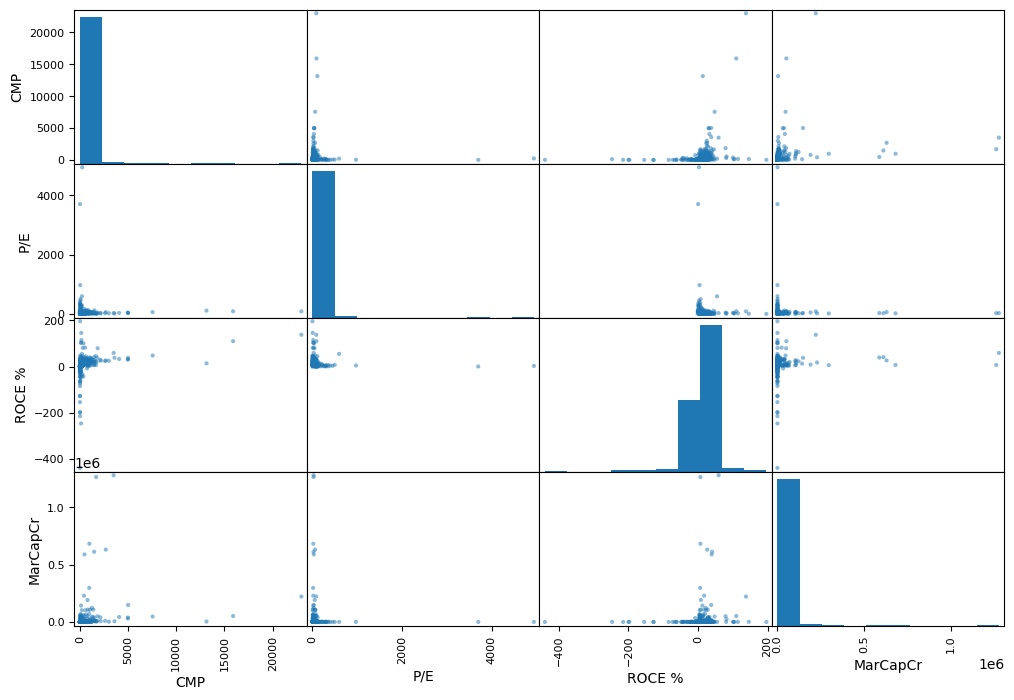

In [37]:
# finding correlations
corr_matrix=market.corr(numeric_only =True)
corr_matrix['CMP'].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
attributes=['CMP','P/E','ROCE\xa0%','MarCapCr']
scatter_matrix(market[attributes],figsize=(12,8))

CMP                 1.000000
ROCE %              0.245858
MarCapCr            0.209696
ROE %               0.156613
PAT 12M Rs.Cr.      0.131674
NetProfitQtrCr      0.117810
Sales Rs.Cr.        0.116541
Sales Qtr Rs.Cr.    0.112571
Div Yld             0.111061
CMP / FCF           0.076317
Prom. Hold. %       0.048759
Qtr Profit Var %    0.015658
P/E                -0.011287
Qtr Sales Var %    -0.019248
SerialNo           -0.233338
Name: CMP, dtype: float64

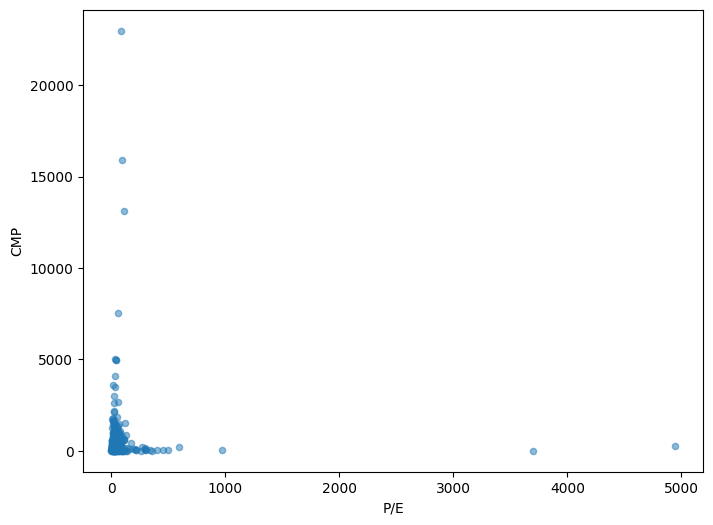

In [41]:
market.plot(kind='scatter',x='P/E',y='CMP',alpha=0.5,figsize=(8,6))
corr_matrix=market.corr(numeric_only =True)
corr_matrix['CMP'].sort_values(ascending=False)

In [24]:
# splitting features & labels & removing unnecessory data
market=train_set.drop(['Name','CMP'],axis=1)
# market=market.drop('Name',axis=1)
market_labels=train_set['CMP'].copy()
market.head() # no TAXRM here as using above data than that operatio
# corr_matrix=market.corr(numeric_only =True)
# corr_matrix['CMP'].sort_values(ascending=False)
# market['CMP']

,SerialNo,P/E,MarCapCr,Div Yld,NetProfitQtrCr,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,PAT 12M Rs.Cr.,ROE %,Prom. Hold. %,CMP / FCF
109,2,25.53,612322.44,2.30,6134.00,7.77,37441.00,16.00,40.67,146767.00,23988.31,31.82,15.14,29.28
271,164,63.12,30.93,0.00,0.13,-7.14,0.55,5.77,3.20,1.90,0.49,2.38,74.99,-21.66
309,202,78.27,8.61,0.00,-0.21,12.50,1.94,-23.92,0.92,10.32,0.11,0.56,68.08,5.34
445,101,7.16,42.53,0.00,3.85,55.24,62.35,30.30,24.18,238.24,5.94,33.53,64.23,16.84
132,25,18.14,8865.33,0.04,132.36,11.79,693.10,17.14,37.05,2647.90,488.82,29.78,53.61,23.84


In [25]:
# missing attributes

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')
imputer = imputer.fit(market)
X=imputer.transform(market)
market_tr=pd.DataFrame(X,columns=market.columns)
market_tr.describe()

,SerialNo,P/E,MarCapCr,Div Yld,NetProfitQtrCr,Qtr Profit Var %,Sales Qtr Rs.Cr.,Qtr Sales Var %,ROCE %,Sales Rs.Cr.,PAT 12M Rs.Cr.,ROE %,Prom. Hold. %,CMP / FCF
count,473.000000,473.000000,4.730000e+02,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,74.807611,62.244323,1.878213e+04,0.366025,191.169619,-23.480063,1650.238879,906.478425,8.729323,6144.915729,742.202791,12.141586,52.722643,13.819641
std,62.283107,290.895361,1.035362e+05,0.921097,1084.826666,1405.644411,6480.927810,14563.448776,39.303346,24263.593912,3956.668348,41.581706,21.519423,286.171399
min,1.000000,1.090000,6.100000e-01,0.000000,-5333.500000,-21050.000000,0.000000,-100.000000,-440.000000,0.000000,-898.170000,-298.880000,0.000000,-2919.240000
25%,22.000000,17.010000,3.503000e+01,0.000000,0.000000,-32.470000,7.290000,1.040000,3.030000,17.680000,0.190000,3.140000,40.370000,-14.060000
50%,59.000000,25.125000,2.064200e+02,0.000000,2.460000,13.790000,65.180000,15.045000,10.050000,185.130000,6.010000,10.370000,57.940000,10.570000
75%,111.000000,39.580000,2.329210e+03,0.320000,26.600000,78.260000,398.250000,30.670000,19.720000,1459.190000,86.900000,18.690000,70.180000,40.100000
max,236.000000,4944.020000,1.279424e+06,12.680000,12403.250000,9500.000000,62961.540000,310933.330000,196.410000,243352.690000,48788.380000,583.750000,100.000000,3372.800000


In [26]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline(
    [
        ('imputer',SimpleImputer(strategy="median")), 
        ('std_scaler',StandardScaler())
        # add as many as needed 
    ]
)
market_num_tr=my_pipeline.fit_transform(market)
market_num_tr

array([[-1.17021615e+00, -1.26345072e-01,  5.73875331e+00, ...,
         4.73747981e-01, -1.74830126e+00,  5.40820232e-02],
       [ 1.43356405e+00,  3.01346733e-03, -1.81299442e-01, ...,
        -2.35005290e-01,  1.03585182e+00, -1.24111652e-01],
       [ 2.04432730e+00,  5.51491913e-02, -1.81515247e-01, ...,
        -2.78820880e-01,  7.14406577e-01, -2.96627075e-02],
       ...,
       [ 1.41749133e+00,  3.56025965e-02, -1.81296735e-01, ...,
        -2.69191080e-01,  8.11165782e-01, -1.84593957e-01],
       [ 2.60255690e-01, -1.87737898e-01, -1.80892584e-01, ...,
        -2.41126728e-02,  8.18608798e-01, -6.29996867e-02],
       [ 4.53128297e-01, -1.27738799e-01, -1.81559336e-01, ...,
        -3.61637159e-01, -1.72783297e+00, -8.95094886e-01]])

In [27]:
#  Model selection 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=DecisionTreeRegressor()
# Mean :  1184.6688399054178
# Standard Deviation :  713.0533301691013

# model=LinearRegression()
# Mean :  1389.605893761905
# Standard Deviation :  766.1883927894916

model=RandomForestRegressor()
# Mean :  1135.8580791894415
# Standard Deviation :   654.7222668526347

model.fit(market_num_tr,market_labels)

# saving the model 
from joblib import dump,load
dump(model,'MarketValuePredictionRMSE850.joblib')

['MarketValuePredictionRMSE850.joblib']

In [28]:
# checking
# evaluating model
from sklearn.metrics import mean_squared_error


some_data=market.iloc[:5]
some_labels=market_labels[:5]
prepare_data=my_pipeline.transform(some_data)
model.predict(prepare_data)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,market_num_tr,market_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

def print_scores(scores):
    print("Scores : ",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation : ",scores.std())

print_scores(rmse_scores)

Scores :  [ 882.37864403 2251.27433325  388.54903392  775.4588334   718.58913519
 1793.89353952  638.16989434  575.00218618 2294.22928387 1833.71985115]
Mean :  1215.1264734863355
Standard Deviation :  702.2920110170078


In [29]:
# Final testing

X_test=test_set.drop(['Name','CMP'],axis=1)
Y_test=test_set['CMP'].copy()
X__test_prepare=my_pipeline.transform(X_test)
final_prediction=model.predict(X__test_prepare)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)   
final_rmse

854.0959068625502

In [30]:
for i in range(len(final_prediction)):
    print(final_prediction[i]," --> ",list(Y_test)[i])
len(final_prediction)
prepare_data[3]

943.4059999999995  -->  592.35
17.394900000000003  -->  13.64
360.65490000000005  -->  129.25
5586.089099999999  -->  1089.8
163.8823  -->  56.35
172.03140000000002  -->  13.45
220.03050000000002  -->  124.85
897.3795  -->  1689.7
56.194299999999984  -->  5.5
2268.0245000000014  -->  2566.6
53.1661  -->  5.2
53.67730000000003  -->  23.08
1435.9809999999995  -->  1890.85
17.063699999999994  -->  24.01
44.25570000000003  -->  54.76
20.3928  -->  17.7
26.939699999999988  -->  11.42
37.362899999999996  -->  124.0
109.7254  -->  112.35
155.60540000000003  -->  113.0
1768.4395000000013  -->  219.05
27.837000000000007  -->  8.13
137.50770000000009  -->  34.35
3998.741499999999  -->  5064.15
295.74  -->  83.0
70.87119999999999  -->  23.33
17.170700000000007  -->  3.61
50.381399999999964  -->  88.99
262.6760000000001  -->  134.9
20.0178  -->  1.0
650.1590000000001  -->  565.9
114.41570000000002  -->  135.45
65.13929999999999  -->  23.23
68.67449999999998  -->  19.66
100.3879  -->  24.1
19.4266 

array([ 0.42098286, -0.18956179, -0.18118729, -0.39780074, -0.17285521,
        0.05606212, -0.24526891, -0.06022654,  0.39352973, -0.24369553,
       -0.18627852,  0.51491538,  0.53530901,  0.01056555])

Current market price predictor of Indian stocks :

 I have manually collected data of 593 stocks ,took 80% as training set & then tried to find correlations,then used scatter_matrix to observe the data .Then observed the correlation matrix of CMP (Current Market Price) ,then splitted data in features & label (label is CMP) .As there was many empry cells in Div Yld ,Qtr sales var % and some others cells ,I have used SimpleImputer to fill the blanks using median value. Then I have tested & evaluated some sklearn models (LinearRegression,DecisionTreeRegressor & RandomForestRegressor) with the data and selected RandomForestRegressor for giving lowest stabdard deviation of 654.7 .

 After selecting the model I have stored that & tested using rest 20% test_set  & printed the predicted value & its original CMP to manually compare .It gave rmse of 854 & the predicted price & original CMP was quite different for most of the predictions & realised I have to learn more about collecting data & ML.